In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, plot_confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
df = pd.read_csv(r"/Users/nileshpatel/Downloads/c2k_data_comma.csv")

In [3]:
df.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,?,?,?,?,?,?,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,?,?,?,?,?,?,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,?,?,?,?,?,?,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,?,?,?,?,?,?,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,?,?,?,?,?,?,4140.0,4797.0,2.0,1.0


In [4]:
df.shape

(3943, 98)

In [5]:
df.describe()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops,legs
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,...,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,1971.342973,7304.492136,2203.533486,1653.323440,205.891933,711.408929,503.703957,796.002790,666.358447,466.677829,...,207.128869,803.902588,479.703957,855.679097,690.343734,461.304414,3573.239726,3698.563673,1.474632,2.012177
std,1138.331044,4246.072270,4683.333105,4553.855588,140.283173,684.789184,232.776578,439.991579,764.145906,237.373952,...,157.631760,817.572534,208.574548,441.088279,446.911715,240.296704,1734.596116,14422.433250,0.512459,0.825165
min,0.000000,1.000000,5.000000,1.000000,75.000000,4.000000,101.000000,50.000000,13.000000,101.000000,...,90.000000,18.000000,101.000000,45.000000,1.000000,100.000000,240.000000,1.000000,1.000000,1.000000
25%,986.250000,3591.250000,377.750000,113.000000,120.000000,263.000000,308.000000,455.000000,274.000000,281.000000,...,90.000000,303.000000,341.000000,630.000000,385.000000,206.000000,2880.000000,400.000000,1.000000,1.000000
50%,1971.500000,7429.500000,1085.000000,340.000000,180.000000,516.000000,485.000000,820.000000,657.500000,485.000000,...,180.000000,600.000000,485.000000,840.000000,658.500000,476.000000,3780.000000,1201.500000,1.000000,2.000000
75%,2956.750000,10922.250000,1946.500000,1375.000000,240.000000,949.750000,700.000000,1020.000000,883.000000,700.000000,...,240.000000,1029.500000,671.000000,1050.000000,920.000000,700.000000,4080.000000,3174.250000,2.000000,3.000000
max,3942.000000,14661.000000,47190.000000,46357.000000,2876.000000,9513.000000,815.000000,5001.000000,38116.000000,815.000000,...,1620.000000,12256.000000,815.000000,4986.000000,5520.000000,815.000000,11520.000000,560130.000000,3.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 98 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nr              3942 non-null   float64
 1   i1_legid        3942 non-null   float64
 2   i1_rcs_p        3942 non-null   float64
 3   i1_rcs_e        3942 non-null   float64
 4   i1_dep_1_p      3942 non-null   float64
 5   i1_dep_1_e      3942 non-null   float64
 6   i1_dep_1_place  3942 non-null   float64
 7   i1_rcf_1_p      3942 non-null   float64
 8   i1_rcf_1_e      3942 non-null   float64
 9   i1_rcf_1_place  3942 non-null   float64
 10  i1_dep_2_p      3942 non-null   object 
 11  i1_dep_2_e      3942 non-null   object 
 12  i1_dep_2_place  3942 non-null   object 
 13  i1_rcf_2_p      3942 non-null   object 
 14  i1_rcf_2_e      3942 non-null   object 
 15  i1_rcf_2_place  3942 non-null   object 
 16  i1_dep_3_p      3942 non-null   object 
 17  i1_dep_3_e      3942 non-null   o

In [7]:
df.isnull().sum()

nr               1
i1_legid         1
i1_rcs_p         1
i1_rcs_e         1
i1_dep_1_p       1
                ..
o_rcf_3_place    1
o_dlv_p          1
o_dlv_e          1
o_hops           1
legs             1
Length: 98, dtype: int64

In [8]:
df.columns

Index(['nr', 'i1_legid', 'i1_rcs_p', 'i1_rcs_e', 'i1_dep_1_p', 'i1_dep_1_e',
       'i1_dep_1_place', 'i1_rcf_1_p', 'i1_rcf_1_e', 'i1_rcf_1_place',
       'i1_dep_2_p', 'i1_dep_2_e', 'i1_dep_2_place', 'i1_rcf_2_p',
       'i1_rcf_2_e', 'i1_rcf_2_place', 'i1_dep_3_p', 'i1_dep_3_e',
       'i1_dep_3_place', 'i1_rcf_3_p', 'i1_rcf_3_e', 'i1_rcf_3_place',
       'i1_dlv_p', 'i1_dlv_e', 'i1_hops', 'i2_legid', 'i2_rcs_p', 'i2_rcs_e',
       'i2_dep_1_p', 'i2_dep_1_e', 'i2_dep_1_place', 'i2_rcf_1_p',
       'i2_rcf_1_e', 'i2_rcf_1_place', 'i2_dep_2_p', 'i2_dep_2_e',
       'i2_dep_2_place', 'i2_rcf_2_p', 'i2_rcf_2_e', 'i2_rcf_2_place',
       'i2_dep_3_p', 'i2_dep_3_e', 'i2_dep_3_place', 'i2_rcf_3_p',
       'i2_rcf_3_e', 'i2_rcf_3_place', 'i2_dlv_p', 'i2_dlv_e', 'i2_hops',
       'i3_legid', 'i3_rcs_p', 'i3_rcs_e', 'i3_dep_1_p', 'i3_dep_1_e',
       'i3_dep_1_place', 'i3_rcf_1_p', 'i3_rcf_1_e', 'i3_rcf_1_place',
       'i3_dep_2_p', 'i3_dep_2_e', 'i3_dep_2_place', 'i3_rcf_2_p',
       'i3_rcf

In [9]:
df.duplicated().sum()

0

In [10]:
df1 = df.dropna()

In [11]:
df1.isnull().sum()

nr               0
i1_legid         0
i1_rcs_p         0
i1_rcs_e         0
i1_dep_1_p       0
                ..
o_rcf_3_place    0
o_dlv_p          0
o_dlv_e          0
o_hops           0
legs             0
Length: 98, dtype: int64

In [12]:
df1['i1_dep_2_p'].unique()

array(['?', '1340', '340', '460', '1014', '495', '905', '660', '3695',
       '1365', '1845', '1785', '485', '1355', '680', '290', '2990', '400',
       '280', '1030', '385', '405', '1055', '1855', '710', '1230', '1410',
       '1175', '1315', '475', '765', '810', '300', '1110', '135', '365',
       '795', '375', '260', '1535', '390', '1105', '305', '665', '650',
       '1420', '325', '910', '1445', '560', '615', '1350', '1140', '335',
       '1910', '1565', '635', '700', '330', '780', '55', '380', '65',
       '240', '85', '915', '120', '470', '1510', '760', '1650', '1065',
       '1500', '1310', '1525', '95', '1035', '1505', '1675', '890', '980',
       '500', '800', '185', '3840', '2800', '720', '585', '110', '965',
       '1930', '825', '45', '370', '50', '480', '1660', '1200', '815',
       '360', '5705', '580', '60', '160', '860', '2070', '2795', '1740',
       '285', '2607', '3605', '1345', '2270', '424', '960', '3000',
       '1215', '2765', '705', '320', '195', '270', '1145', 

In [15]:
df1['i1_dep_2_e'].unique()

array(['?', '1109', '289', '563', '1531', '655', '983', '784', '3647',
       '1485', '1786', '649', '2014', '534', '461', '429', '3143', '451',
       '266', '1285', '335', '206', '1087', '1841', '779', '707', '1478',
       '1273', '1471', '776', '718', '1126', '265', '1089', '329', '481',
       '917', '547', '229', '355', '1518', '166', '1422', '558', '636',
       '855', '1835', '360', '880', '1834', '813', '1114', '862', '1468',
       '1163', '477', '2017', '1707', '884', '943', '421', '793', '177',
       '232', '571', '657', '353', '349', '313', '1077', '331', '1137',
       '294', '801', '1778', '1068', '1579', '1187', '325', '1318',
       '6091', '103', '1046', '1881', '1624', '871', '1051', '732', '812',
       '216', '2771', '2970', '605', '646', '478', '1409', '1255', '564',
       '2553', '1069', '334', '503', '125', '1743', '804', '1811', '1399',
       '1325', '337', '6186', '297', '915', '2571', '654', '310', '542',
       '842', '252', '1420', '363', '338', '856', '

In [16]:
count = df1['i1_dep_2_e'].value_counts()['?']
print(count)

2747


In [17]:
df1 = df1.replace('?',np.NaN)
df1

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4140.0,4797.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,3938.0,4166.0,703.0,360.0,210.0,493.0,233.0,1000.0,908.0,815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,300.0,2512.0,2.0,3.0
3938,3939.0,4225.0,122.0,19.0,240.0,278.0,815.0,830.0,761.0,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1665.0,1300.0,2.0,3.0
3939,3940.0,14017.0,2028.0,413.0,270.0,1825.0,605.0,2610.0,2535.0,349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,807.0,2.0,1.0
3940,3941.0,4660.0,1356.0,178.0,240.0,1359.0,815.0,760.0,716.0,609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5100.0,4381.0,2.0,1.0


In [18]:
df1 = df1.apply(pd.to_numeric)
df1.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4140.0,4797.0,2.0,1.0


In [19]:
for col in df1.columns:
    df1[col] = df1[col].replace(np.NaN, df1[col].mean())
df1.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,...,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,...,785.0,846.307692,545.961538,1179.653846,911.576923,438.961538,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,...,785.0,846.307692,545.961538,1179.653846,911.576923,438.961538,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,...,785.0,846.307692,545.961538,1179.653846,911.576923,438.961538,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,...,785.0,846.307692,545.961538,1179.653846,911.576923,438.961538,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,...,785.0,846.307692,545.961538,1179.653846,911.576923,438.961538,4140.0,4797.0,2.0,1.0


In [20]:
df1.isnull().sum()

nr               0
i1_legid         0
i1_rcs_p         0
i1_rcs_e         0
i1_dep_1_p       0
                ..
o_rcf_3_place    0
o_dlv_p          0
o_dlv_e          0
o_hops           0
legs             0
Length: 98, dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3941
Data columns (total 98 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nr              3942 non-null   float64
 1   i1_legid        3942 non-null   float64
 2   i1_rcs_p        3942 non-null   float64
 3   i1_rcs_e        3942 non-null   float64
 4   i1_dep_1_p      3942 non-null   float64
 5   i1_dep_1_e      3942 non-null   float64
 6   i1_dep_1_place  3942 non-null   float64
 7   i1_rcf_1_p      3942 non-null   float64
 8   i1_rcf_1_e      3942 non-null   float64
 9   i1_rcf_1_place  3942 non-null   float64
 10  i1_dep_2_p      3942 non-null   float64
 11  i1_dep_2_e      3942 non-null   float64
 12  i1_dep_2_place  3942 non-null   float64
 13  i1_rcf_2_p      3942 non-null   float64
 14  i1_rcf_2_e      3942 non-null   float64
 15  i1_rcf_2_place  3942 non-null   float64
 16  i1_dep_3_p      3942 non-null   float64
 17  i1_dep_3_e      3942 non-null   f

In [22]:
df1['legs'].unique()

array([2., 1., 3.])

In [23]:
df1['o_hops'].unique()

array([1., 2., 3.])

<AxesSubplot:>

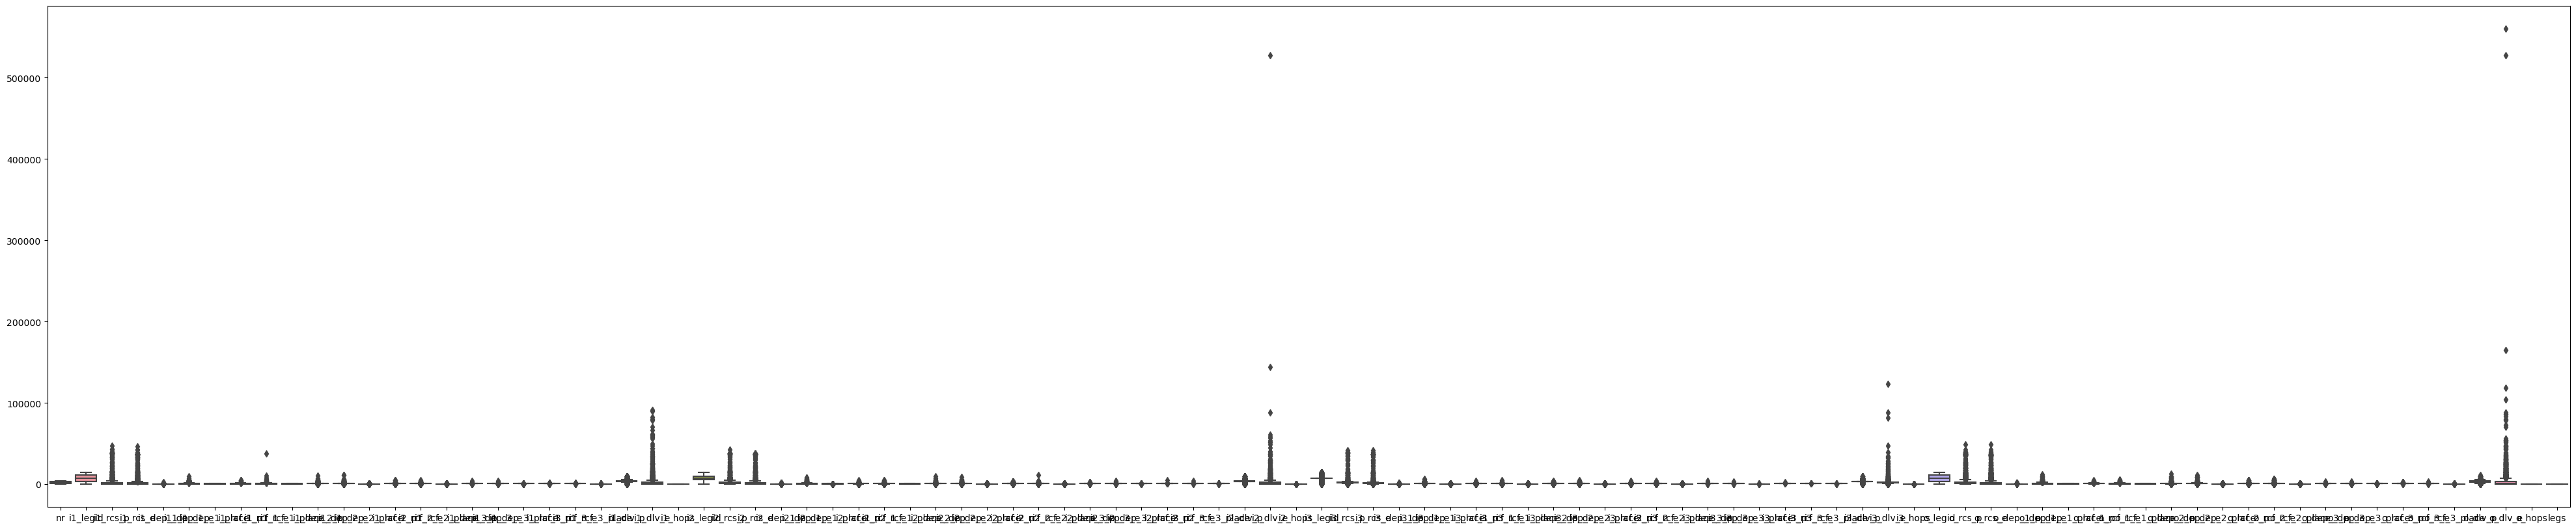

In [24]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df1)

/var/folders/fb/vbxygbd56w7591dryps0mfgm0000gn/T/ipykernel_34902/1310272007.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k = -1)


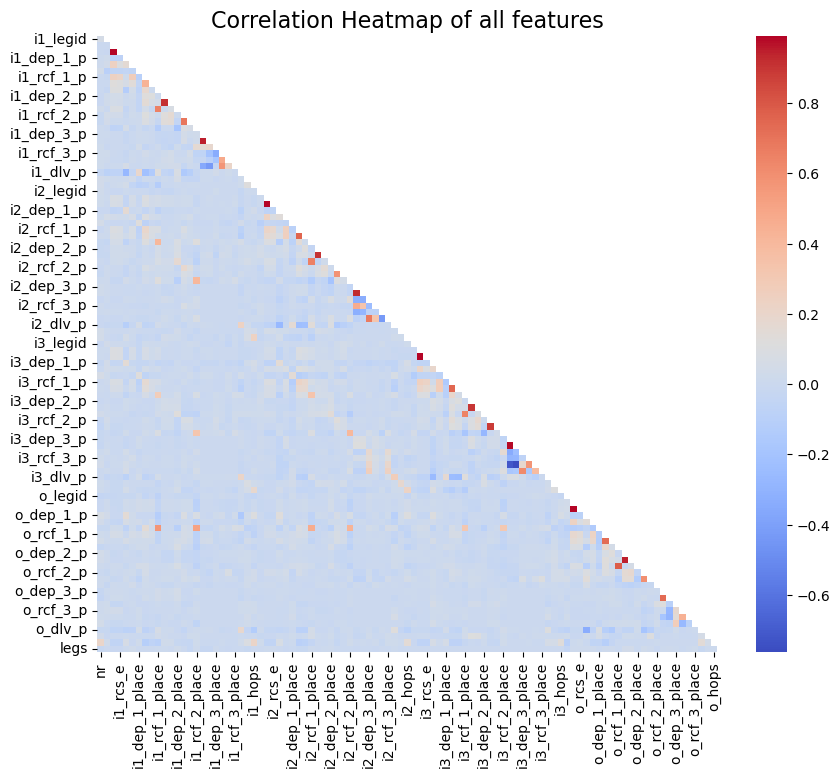

In [25]:
corr_mat = df1.corr()
mask = np.tril(np.ones_like(corr_mat, dtype = np.bool), k = -1)
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat.where(mask).iloc[1:,:-1], annot=False, cmap = 'coolwarm')
plt.title('Correlation Heatmap of all features', fontsize = 16)
plt.show()

In [26]:
x = df1.drop(columns = ['legs'])
y = df1['legs']

In [27]:
x.shape

(3942, 97)

In [28]:
y.shape

(3942,)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 101)

# Random Forest

In [52]:
forest = RandomForestClassifier()

In [53]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
forest.score(x_train,y_train)

1.0

# Standard Scaling

In [30]:
scaler = StandardScaler()

In [31]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(x_train,y_train)

/Users/nileshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
lr.score(x_train,y_train)

0.4780717651322943

In [43]:
lr.score(x_test,y_test)

0.3989856297548605

In [44]:
lr_pred = lr.predict(x_test)
lr_pred

array([2., 3., 1., ..., 2., 3., 2.])

In [45]:
accuracy_score(y_test,lr_pred)

0.3989856297548605

In [77]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 10000)

In [78]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [79]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [ ]:
grid_model.fit(x_train, y_train)

In [ ]:
grid_model.best_params_

# KNN

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)

In [48]:
knn_pred = knn.predict(x_test)
knn_pred

/Users/nileshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1., 1., 1., ..., 1., 1., 3.])

In [51]:
accuracy_score(y_test,knn_pred)

0.6846999154691462

# SVC

In [55]:
svc = SVC()

In [56]:
svc.fit(x_train,y_train)

SVC()

In [57]:
svc_pred = svc.predict(x_test)
svc_pred

array([3., 1., 1., ..., 3., 2., 3.])

In [64]:
accuracy_score(y_test,svc_pred)

0.9501267962806424

/Users/nileshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


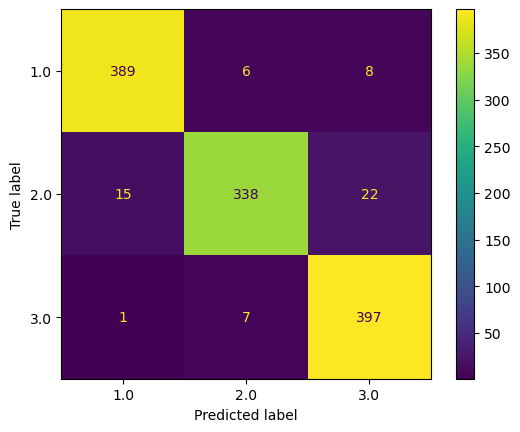

In [58]:
plot_confusion_matrix(svc,x_test,y_test)

In [60]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc

In [61]:
def plot_multiclass_roc(clf, x_test, y_test, n_classes, figsize=(8,8)):
    y_score = clf.decision_function(x_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

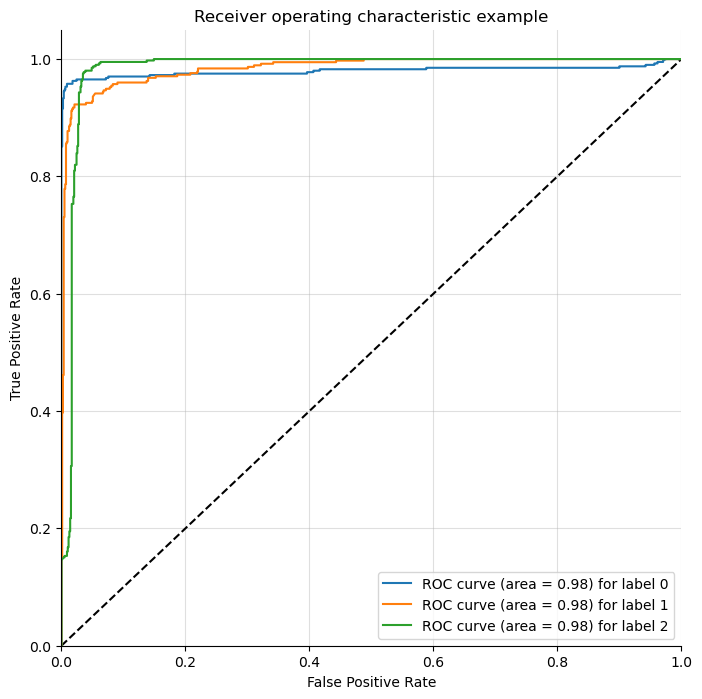

In [63]:
plot_multiclass_roc(svc, x_test, y_test, n_classes =3)

# Naive Bayes

In [65]:
NB = GaussianNB()

In [66]:
NB.fit(x_train,y_train)

GaussianNB()

In [67]:
NB.score(x_train,y_train)

0.9989126495106923

In [68]:
NB.score(x_test,y_test)

0.9949281487743026

In [70]:
NB_pred = NB.predict(x_test)
NB_pred

array([3., 1., 1., ..., 3., 2., 3.])

In [71]:
accuracy_score(y_test,NB_pred)

0.9949281487743026

/Users/nileshpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


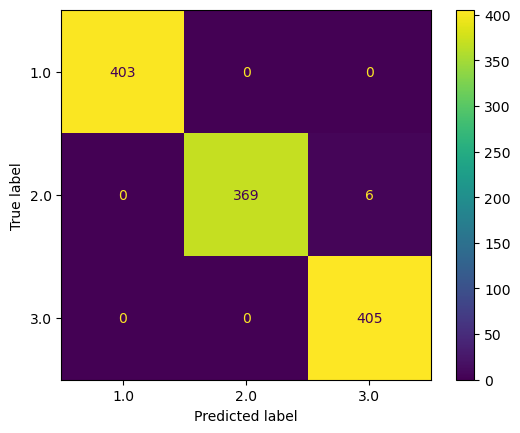

In [74]:
plot_confusion_matrix(NB,x_test,y_test)